In [ ]:
import random
from animalai.environment import AnimalAIEnvironment
from wrappers import CustomUnityToGymWrapper

In [ ]:
aai_seed = 0
port = 5005 + random.randint(
    0, 1000
)  # uses a random port to avoid problems if a previous version exits slowly
# env_path = "/Users/Ile-Maurice/Desktop/MacOS/MacOS"
env_path = "/home/ezrahuang/AAI/LINUX/AAI.x86_64"
configuration_file = "./animal_ai_environments/yroom.yaml"
watch = True

aai_env = AnimalAIEnvironment(
    file_name=env_path,  # Path to the environment
    seed=aai_seed,  # seed for the pseudo random generators
    arenas_configurations=configuration_file,
    play=False,  # note that this is set to False for training
    base_port=port,  # the port to use for communication between python and the Unity environment
    inference=watch,  # set to True if you want to watch the agent play
    useCamera=True,  # set to False if you don't want to use the camera (no visual observations)
    resolution=84,
    useRayCasts=False,  # set to True if you want to use raycasts
    no_graphics=False,  # set to True if you don't want to use the graphics ('headless' mode)
    timescale=1,
)

env = CustomUnityToGymWrapper(
    aai_env, uint8_visual=False, allow_multiple_obs=True, flatten_branched=True
)  # the wrapper for the environment

# # fix for error generated by the gym wrapper on line 241, python3.10/site-packages/mlagents_envs/rpc_utils.py in _observation_to_np_array
# # use img = img.reshape(obs.shape)

In [ ]:
print(env.action_space)
# 0 - nothing
# 1 - rotate right by 6 degrees
# 2 - rotate left by 6 degrees
# 3 - accelerate forward
# 4 - accelerate forward and rotate CW by 6 degrees
# 5 - accelerate forward and rotate CCW by 6 degrees
# 6 - accelerate backward
# 7 - accelerate backward and rotate CW by 6 degrees
# 8 - accelerate backward and rotate CCW by 6 degrees


print(env.observation_space) # see python3.10/site-packages/animalai/environment.py, line 202
# Box(84, 84, 3) - rgb image
# Box(-inf, inf, (7,)) - (health; v1, v2, v3; p1, p2, p3)

In [ ]:
env.reset()

In [ ]:
# for i in range(60):
#     obs, reward, done, info = env.step(1)
#     print("health:", obs[1][1])
#     print("vel:", obs[1][1:4]) # (v?, v?, v forward/backard relative to starting orientation)
#     print("pos:", obs[1][4:7]) # (p?, p?, p forward/backard relative to starting orientation)

# for i in range(30):
#     obs, reward, done, info = env.step(4)
#     obs, reward, done, info = env.step(7)
#     print("health:", obs[1][1])
#     print("vel:", obs[1][1:4])
#     print("pos:", obs[1][4:7])

obs, reward, done, info = env.step(3)
print("obs[0] shape", obs[0].shape)
print("obs[0][0] ", obs[0][0])
print("health:", obs[1][1])
print("vel:", obs[1][1:4])
print("pos:", obs[1][4:7])

In [ ]:
env.close()

In [1]:
import random
from animalai.environment import AnimalAIEnvironment
from wrappers import CustomUnityToGymWrapper
from animalai_agent import AnimalAIVectorhashAgent
from vectorhash import build_vectorhash_architecture
from shifts import RatShift
from smoothing import RatSLAMSmoothing
import random

### vhash
device = "cuda"
shapes = [(3, 3, 4), (4, 4, 5)]
model = build_vectorhash_architecture(
    shapes,
    N_h=600,
    input_size=84 * 84,
    initalization_method="by_sparsity",
    limits=(40, 40, 360),
    device=device,
    shift=RatShift(),
    smoothing=RatSLAMSmoothing(device=device),
)


### animalai
aai_seed = 0
port = 5005 + random.randint(
    0, 1000
)  # uses a random port to avoid problems if a previous version exits slowly
# env_path = "/Users/Ile-Maurice/Desktop/MacOS/MacOS"
env_path = "/home/ezrahuang/AAI/LINUX/AAI.x86_64"
configuration_file = "./animal_ai_environments/yroom.yaml"
watch = True

aai_env = AnimalAIEnvironment(
    file_name=env_path,  # Path to the environment
    seed=aai_seed,  # seed for the pseudo random generators
    arenas_configurations=configuration_file,
    play=False,  # note that this is set to False for training
    base_port=port,  # the port to use for communication between python and the Unity environment
    inference=False,  # set to True if you want to watch the agent play
    useCamera=True,  # set to False if you don't want to use the camera (no visual observations)
    resolution=84,
    useRayCasts=False,  # set to True if you want to use raycasts
    no_graphics=False,  # set to True if you don't want to use the graphics ('headless' mode)
    timescale=0.1,
)

env = CustomUnityToGymWrapper(
    aai_env, uint8_visual=False, allow_multiple_obs=True, flatten_branched=True
)  # the wrapper for the environment

#### agent
agent = AnimalAIVectorhashAgent(model, env)

by_sparsity
module shapes:  [(3, 3, 4), (4, 4, 5)]
N_g     :  116
N_patts :  2880
N_h     :  600
[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
 

/home/ezrahuang/Projects/rl-research/vectorhash/hippocampal_sensory_layers.py:107: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  1 + input.T @ self.inhibition_matrix_hs @ input


info for each h directly after learning it


/home/ezrahuang/miniconda3/envs/ml/lib/python3.10/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


h max, min, mean tensor(6.0164, device='cuda:0') tensor(-3.8011, device='cuda:0') tensor(1.6837, device='cuda:0')
h_from_s max, min, mean tensor(6.0146, device='cuda:0') tensor(-3.8000, device='cuda:0') tensor(1.6832, device='cuda:0')
h_from_s_denoised max, min, mean tensor(2.2952, device='cuda:0') tensor(1.1596, device='cuda:0') tensor(1.7236, device='cuda:0')
avg nonzero/greaterzero h from book: tensor(600, device='cuda:0') tensor(547, device='cuda:0')
avg nonzero/greaterzero h from s: tensor(600, device='cuda:0') tensor(547, device='cuda:0')
avg nonzero/greaterzero h from s denoised: tensor(600, device='cuda:0') tensor(600, device='cuda:0')
mse/cosinesimilarity h from book and h from s tensor(4.0499e-07, device='cuda:0') tensor([1.], device='cuda:0')
mse/cosinesimilarity h from book and h from s denoised tensor(1.6373, device='cuda:0') tensor([0.8004], device='cuda:0')
mse/cosinesimilarity s and s from h from s tensor(4.5716e-06, device='cuda:0') tensor([1.0000], device='cuda:0')
ms

/home/ezrahuang/Projects/rl-research/vectorhash/vectorhash.py:102: UserWarning: Using a target size (torch.Size([1, 600])) that is different to the input size (torch.Size([600])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(h, h_from_s),
/home/ezrahuang/Projects/rl-research/vectorhash/vectorhash.py:109: UserWarning: Using a target size (torch.Size([1, 600])) that is different to the input size (torch.Size([600])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(h, h_from_s_denoised),
/home/ezrahuang/Projects/rl-research/vectorhash/vectorhash.py:125: UserWarning: Using a target size (torch.Size([1, 7056])) that is different to the input size (torch.Size([7056])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(s, s_from_h_from_s)

In [2]:
from test_utils import generate_animalai_path
# path = generate_animalai_path(20)
path = [3,] * 10 + [1,] * 15


In [3]:
agent.test_path(path)

img.shape (3, 84, 84)
obs.shape [84, 84, 3]
info for each h directly after learning it
h max, min, mean tensor(6.0164, device='cuda:0') tensor(-3.8011, device='cuda:0') tensor(1.6837, device='cuda:0')
h_from_s max, min, mean tensor(6.0151, device='cuda:0') tensor(-3.8004, device='cuda:0') tensor(1.6833, device='cuda:0')
h_from_s_denoised max, min, mean tensor(2.2952, device='cuda:0') tensor(1.1596, device='cuda:0') tensor(1.7236, device='cuda:0')
avg nonzero/greaterzero h from book: tensor(600, device='cuda:0') tensor(547, device='cuda:0')
avg nonzero/greaterzero h from s: tensor(600, device='cuda:0') tensor(547, device='cuda:0')
avg nonzero/greaterzero h from s denoised: tensor(600, device='cuda:0') tensor(600, device='cuda:0')
mse/cosinesimilarity h from book and h from s tensor(1.9176e-07, device='cuda:0') tensor([1.], device='cuda:0')
mse/cosinesimilarity h from book and h from s denoised tensor(1.6373, device='cuda:0') tensor([0.8004], device='cuda:0')
mse/cosinesimilarity s and s

([tensor([0., 0., 0.])],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

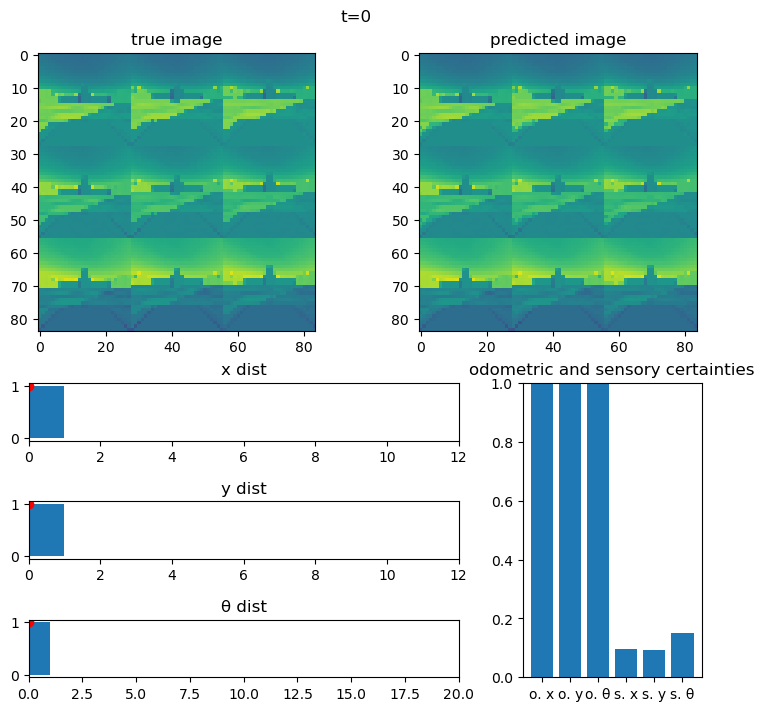

In [4]:
ani = agent.history.make_image_video()

In [5]:
ani.save("gifs/testpath2.gif", progress_callback=lambda current, total: print(f"frame {current}/{total}"), dpi=150)

frame 0/25
frame 1/25
frame 2/25
frame 3/25
frame 4/25
frame 5/25
frame 6/25
frame 7/25
frame 8/25
frame 9/25
frame 10/25
frame 11/25
frame 12/25
frame 13/25
frame 14/25
frame 15/25
frame 16/25
frame 17/25
frame 18/25
frame 19/25
frame 20/25
frame 21/25
frame 22/25
frame 23/25
frame 24/25


In [ ]:
agent.history._estimated_images

In [ ]:
env.close()